# Исследование надежности заемщиков


Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

Описание данных
- children — количество детей в семье
- days_employed — общий трудовой стаж в днях
- dob_years — возраст клиента в годах
- education — уровень образования клиента
- education_id — идентификатор уровня образования
- family_status — семейное положение
- family_status_id — идентификатор семейного положения
- gender — пол клиента
- income_type — тип занятости
- debt — имел ли задолженность по возврату кредитов
- total_income — ежемесячный доход
- purpose — цель получения кредита. 



## Откройте таблицу и изучите общую информацию о данных

Импорт библиотеки pandas. Загрузка данных. Путь к файлу:

`/datasets/data.csv`

In [ ]:
import pandas as pd

In [ ]:
try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

### Вывод первых 20 строчек датафрейма `data` на экран.

In [ ]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


### Вывод основной информации о датафрейме с помощью метода `info()`.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

### Вывод количества пропущенных значений для каждого столбца.

In [ ]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

В двух столбцах есть пропущенные значения. Один из них — `days_employed`. 
Столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.

In [ ]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Требуется обработать значения в этом столбце: заменить все отрицательные значения положительными с помощью метода `abs()`.

In [ ]:
data['days_employed'] = data['days_employed'].abs()

### Вывод для каждого типа занятости медианное значение трудового стажа `days_employed` в днях.

In [ ]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

### Вывод перечня уникальных значений столбца `children`.

In [ ]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

В столбце `children` есть два аномальных значения. Нужно удалить строки, в которых встречаются такие аномальные значения из датафрейма `data`.

In [ ]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

In [ ]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

Заполнение пропусков в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.

In [ ]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

In [ ]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

Замена вещественного тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.

In [ ]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

Обработка неявных дубликатов в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв.

In [ ]:
data['education'] = data['education'].str.lower()

Вывод на экран количество строк-дубликатов в данных.

In [ ]:
data.duplicated().sum()

71

In [ ]:
data = data.drop_duplicates()

### Категоризация данных

На основании диапазонов, указанных ниже, создание в датафрейме `data` столбца `total_income_category` с категориями:

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

In [ ]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [ ]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

Создание функции, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.


In [ ]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [ ]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследование данных

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [ ]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
data['debt'].corr(data['children'])

0.02464341543959104

<AxesSubplot:xlabel='children'>

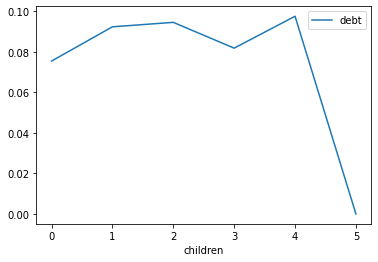

In [ ]:
#Построим сводную таблицу по количеству детей и среднему значению долгов, визуализируем результат
pd.pivot_table(data[['debt','children']], index=['children'], aggfunc='mean').plot()

In [ ]:
#Проверим количество строк по каждому значению
data['children'].value_counts()

0    14091
1     4808
2     2052
3      330
4       41
5        9
Name: children, dtype: int64

In [ ]:
#Сводная таблица,содержащая свдения о проценте просроченных долгов по категориям
children_factor = pd.pivot_table(data[['debt','children']], index=['children'], aggfunc=['count', 'sum'])
children_factor.columns = ['total_count', 'debt_count']
children_factor['debt_percentage'] = (children_factor['debt_count']/children_factor['total_count'])*100
children_factor

,total_count,debt_count,debt_percentage
children,,,
0,14091,1063,7.543822
1,4808,444,9.234609
2,2052,194,9.454191
3,330,27,8.181818
4,41,4,9.756098
5,9,0,0.000000


**Вывод:** 
Явной зависимости между количеством детей и возвратом кредита в срок нет, случаев с пятью детьми мало.
В категории без детей (0) процент возвратов кредитов в среднем на 2% выше, чем у остальных категорий. 

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

<AxesSubplot:xlabel='family_status'>

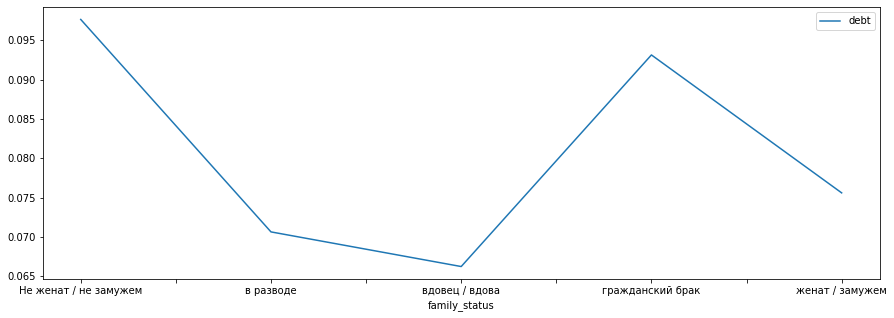

In [ ]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
pd.pivot_table(data[['debt','family_status']], index=['family_status'], aggfunc='mean').plot(figsize=(15, 5))

In [ ]:
#Сводная таблица,содержащая свдения о проценте просроченных долгов по категориям
family_status_factor = pd.pivot_table(data[['debt','family_status']], index=['family_status'], aggfunc=['count', 'sum'])
family_status_factor.columns = ['total_count', 'debt_count']
family_status_factor['debt_percentage'] = (family_status_factor['debt_count']/family_status_factor['total_count'])*100
family_status_factor.sort_values(by='debt_percentage', ascending=False)

,total_count,debt_count,debt_percentage
family_status,,,
Не женат / не замужем,2796,273,9.763948
гражданский брак,4134,385,9.313014
женат / замужем,12261,927,7.560558
в разводе,1189,84,7.064760
вдовец / вдова,951,63,6.624606


**Вывод:** 
Наблюдается увеличение количества долгов у не женатых/не замужних и у людей в гражданском браке.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

<AxesSubplot:xlabel='total_income_category'>

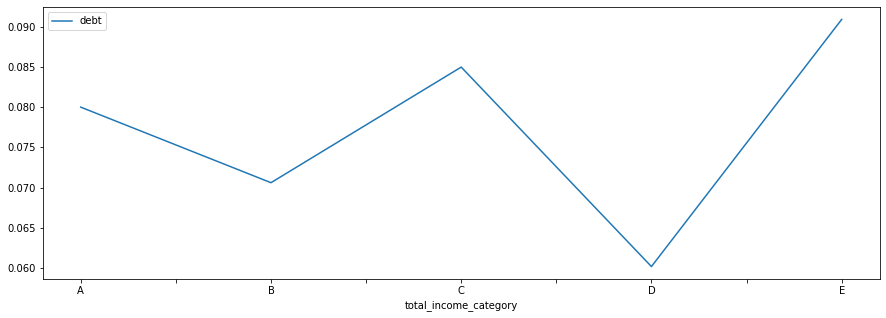

In [ ]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
pd.pivot_table(data[['debt','total_income_category']], index=['total_income_category'], aggfunc='mean').plot(figsize=(15, 5))

In [ ]:
#Проверим количество строк по каждому значению
data['total_income_category'].value_counts()

C    15921
B     5014
D      349
A       25
E       22
Name: total_income_category, dtype: int64

In [ ]:
#Сводная таблица,содержащая свдения о проценте просроченных долгов по категориям
total_income_category_factor = pd.pivot_table(data[['debt','total_income_category']], index=['total_income_category'], aggfunc=['count', 'sum'])
total_income_category_factor.columns = ['total_count', 'debt_count']
total_income_category_factor['debt_percentage'] = (total_income_category_factor['debt_count']/total_income_category_factor['total_count'])*100
total_income_category_factor

,total_count,debt_count,debt_percentage
total_income_category,,,
A,25,2,8.000000
B,5014,354,7.060231
C,15921,1353,8.498210
D,349,21,6.017192
E,22,2,9.090909


**Вывод:** 
Исходя из малого количества данных, относящихся к категориям A(25), D(349), E(22), целесообразно сравнить категории B и C. Люди с доходом 50001–200000 (категория 'C') возвращают долги чаще людей с доходом 200001–1000000 (категория 'В') почти на 1,5%.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

<AxesSubplot:xlabel='purpose_category'>

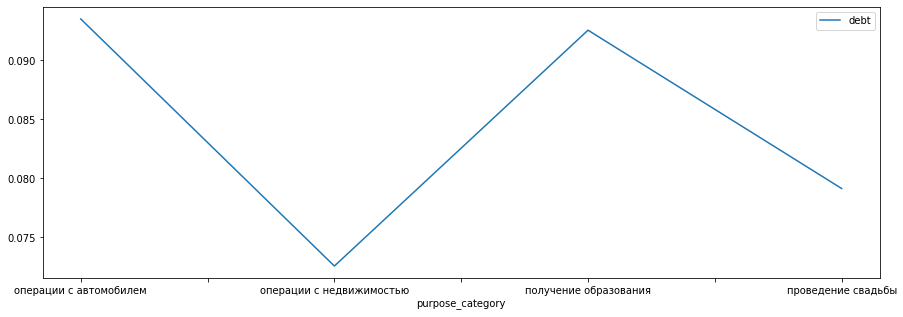

In [ ]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
pd.pivot_table(data[['debt','purpose_category']], index=['purpose_category'], aggfunc='mean').plot(figsize=(15, 5))

In [ ]:
#Проверим количество строк по каждому значению
data['purpose_category'].value_counts()

операции с недвижимостью    10751
операции с автомобилем       4279
получение образования        3988
проведение свадьбы           2313
Name: purpose_category, dtype: int64

In [ ]:
#Сводная таблица,содержащая свдения о проценте просроченных долгов по категориям
purpose_category_factor = pd.pivot_table(data[['debt','purpose_category']], index=['purpose_category'], aggfunc=['count', 'sum'])
purpose_category_factor.columns = ['total_count', 'debt_count']
purpose_category_factor['debt_percentage'] = (purpose_category_factor['debt_count']/purpose_category_factor['total_count'])*100
purpose_category_factor.sort_values(by='debt_percentage', ascending=False)

,total_count,debt_count,debt_percentage
purpose_category,,,
операции с автомобилем,4279,400,9.347978
получение образования,3988,369,9.252758
проведение свадьбы,2313,183,7.911803
операции с недвижимостью,10751,780,7.255139


**Вывод:** 
Хуже всего возвращают кредиты на операции с автомобилем и получение образования. Лучше всего возвращают кредиты на недвижимость.

#### 3.5 Возможные причины появления пропусков в исходных данных.

Пропуски в исходных данных встречаются в двух параметрах: days_employed (стаж работы) и total_income (доход). Вероятно, эту информацию о себе люди не указали (при заполнении анкеты). Причинами пропусков могут также быть ошибки ввода или извлечения данных.

### Шаг 4: общий вывод.

Были рассмотрены несколько факторов, которые предполагаемо могуут влиять на своевременный возврат кредита, а именно: количество детей у заявителя, его семейное положение, уровень дохода и цель кредита.

- Явной зависимости между количеством детей и возвратом кредита в срок нет, случаев с пятью детьми мало. В категории без детей (0) процент возвратов кредитов в среднем на 2% выше, чем у остальных категорий. В случае с пятью детьми наблюдается  отсутсвие неоплаченных долгов, однако трудно делать определенный вывод, так как такое количество детей встречается только 9 раз.
- В зависимости от семейного положения наблюдается разное положение с возвратами кредитов: лучше всего возвращают разведенные, вдовцы и женатые, а хуже всего холостые.(возможное объяснение: различный возраст - холостые моложе, и, как следствие, стаж работы/доход)
- Уровень дохода влияет на возврат кредита, лучше всего возвращают люди с доходом в категории D и B, а хуже всего с E. Исходя из малого количества данных, относящихся к категориям A(25), D(349), E(22), целесообразно сравнить категории B и C. Люди с доходом 50001–200000 (категория 'C') возвращают долги чаще людей с доходом 200001–1000000 (категория 'В') почти на 1,5%. 
- Кредиты на недвижимость возвращают лучше всего (возможное объяснение: сумма как правило существенная и берется осознанно, зачастую под залог) и на свадьбу (возможное объяснение: сумма, как правило, небольшая, частично может возвращаеться с подарков), а хуже всего на операции с автомобилем.

Возможно стоит продолжить исследование, взяв более широкую выборку для полноценного учета всех категорий.
Также стоит рассмотреть влияние суммы кредита на процент возвратов.